# Capturing the 2D Ellipticities of Stellar Particles in CAMELS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
import hdf5plugin
import treecorr
import time

#### Import Data

In [2]:
# snapshot name
snapshot = r'C:\CAMELS DATA\LH643_snap_033.hdf5'
# open the snapshot
f = h5py.File(snapshot, 'r')

pos_s = f['PartType4/Coordinates'][:]/1e3  # star positions in Mpc/h
dens_s = f['PartType4/SubfindDensity'][:]*1e10/1e3**3 # surrounding area density of star in Msun/Mpc^3
pos_dm = f['PartType1/Coordinates'][:]/1e3  #positions of dark matter in Mpc/h
# close file
f.close()
# catalogue name
catalogue = r'C:\CAMELS DATA\LH643_fof_subhalo_tab_033.hdf5'
# open the catalogue
f = h5py.File(catalogue, 'r')

pos_sh  = f['Subhalo/SubhaloPos'][:]/1e3     #positions of SUBFIND subhalos in Mpc/h
subh_M_R_12 = f['Subhalo/SubhaloMassInRadType'][:,4]*1e10 # total stellar mass of twice the stellare alf-mass radius in Msun/h
# close file
f.close()

In [3]:
pos_g = pos_sh[subh_M_R_12>1e9]
print('Galaxy positions shape: ', pos_g.shape)

Galaxy positions shape:  (833, 3)


#### Slicing Star Positions and galaxy positions to create 15 '2D' images.

In [4]:
def slicer(array, num_slices=15, mass_array=None, mass=False):
    '''Slices positions of particles in a box along the z axis
    array has shape (N,3)
    (if mass=True we also slice the mass of the particle with index corresponding to index in position array)
    Returns a dictionary (or two) with each section containing positions of that slice'''
    box_length = 25.0  # Length of the 3D box
    pos_index = 0
    slice_size = box_length / num_slices  # Size of each slice along the z-axis
    # Initialize an empty dictionary to store the particle positions for each slice
    sliced_positions = {}
    sliced_masses = {}
    # Initialize the dictionary with empty arrays for each slice
    for i in range(num_slices):
        sliced_positions[i] = []
        if mass == True:
            sliced_masses[i] = []
    # Iterate over each particle position
    for position in array:
        # Calculate the index of the slice based on the z-coordinate
        slice_index = int(position[2] // slice_size)

        # Append the position to the corresponding slice's array
        sliced_positions[slice_index].append(position)
        if mass==True:
            sliced_masses[slice_index].append(mass_array[pos_index])
            pos_index +=1

    # Convert the lists to numpy arrays
    for slice_index in sliced_positions:
        sliced_positions[slice_index] = np.array(sliced_positions[slice_index])
        if mass==True: 
            sliced_masses[slice_index] = np.array(sliced_masses[slice_index])
    # Print the positions for each slice
    for slice_index in sliced_positions:
        print(f"Slice {slice_index} shape: ", sliced_positions[slice_index].shape)
    if mass==True:
        return sliced_positions, sliced_masses
    else:
        return sliced_positions

In [5]:
sliced_s, sliced_s_den = slicer(pos_s, num_slices=15, mass_array=dens_s, mass=True) # slicing stars with respecitve surrounding density
sliced_g = slicer(pos_g, num_slices=15) # slicing galaxies
sliced_dm = slicer(pos_dm, num_slices=15) # slicing galaxies

Slice 0 shape:  (118601, 3)
Slice 1 shape:  (20139, 3)
Slice 2 shape:  (23228, 3)
Slice 3 shape:  (20018, 3)
Slice 4 shape:  (35715, 3)
Slice 5 shape:  (44831, 3)
Slice 6 shape:  (196453, 3)
Slice 7 shape:  (20407, 3)
Slice 8 shape:  (63485, 3)
Slice 9 shape:  (72071, 3)
Slice 10 shape:  (115227, 3)
Slice 11 shape:  (83799, 3)
Slice 12 shape:  (106591, 3)
Slice 13 shape:  (553119, 3)
Slice 14 shape:  (188358, 3)
Slice 0 shape:  (60, 3)
Slice 1 shape:  (21, 3)
Slice 2 shape:  (19, 3)
Slice 3 shape:  (11, 3)
Slice 4 shape:  (21, 3)
Slice 5 shape:  (35, 3)
Slice 6 shape:  (67, 3)
Slice 7 shape:  (32, 3)
Slice 8 shape:  (49, 3)
Slice 9 shape:  (54, 3)
Slice 10 shape:  (48, 3)
Slice 11 shape:  (43, 3)
Slice 12 shape:  (61, 3)
Slice 13 shape:  (222, 3)
Slice 14 shape:  (90, 3)
Slice 0 shape:  (1209864, 3)
Slice 1 shape:  (492697, 3)
Slice 2 shape:  (452736, 3)
Slice 3 shape:  (430745, 3)
Slice 4 shape:  (560131, 3)
Slice 5 shape:  (702403, 3)
Slice 6 shape:  (1397609, 3)
Slice 7 shape:  (503

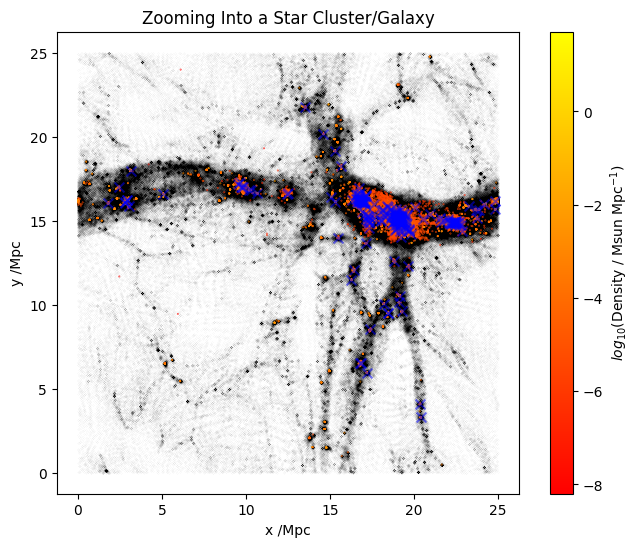

In [6]:
_slice_ = 13
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(sliced_dm[_slice_][:,1] , sliced_dm[_slice_][:,0], marker='o', s=0.0005, alpha=0.5,c='k')
im= ax.scatter(sliced_s[_slice_][:,1] , sliced_s[_slice_][:,0], c=np.log10(sliced_s_den[_slice_]),
               marker='o', s=0.1, alpha=1,cmap='autumn')
ax.scatter(sliced_g[_slice_][:,1] , sliced_g[_slice_][:,0], marker='x', s=50, alpha=0.5,c='b')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'$log_{10}$(Density / Msun Mpc$^{-1}$)')
ax.set_xlabel('x /Mpc')
ax.set_ylabel('y /Mpc')
ax.set_title(f'Zooming Into a Star Cluster/Galaxy')
ax.set_box_aspect(1)
plt.show()

In [7]:
from matplotlib import colors 

(16.95, 17.08)

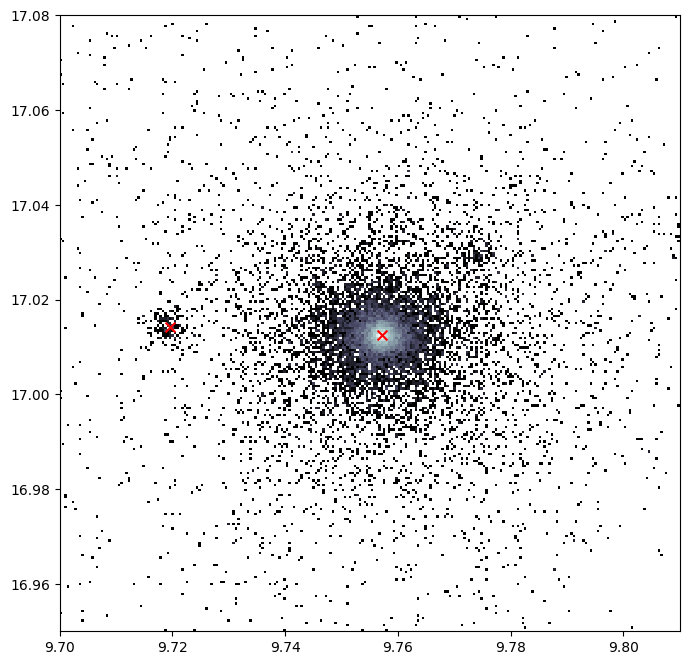

In [8]:
fig = plt.figure(figsize=(8,8))

plt.hist2d(sliced_s[_slice_][:,1] , sliced_s[_slice_][:,0],cmap='bone',norm=colors.LogNorm(),
           bins=(np.linspace(9.70,9.81,256),np.linspace(16.95,17.08,256)))
plt.scatter(sliced_g[_slice_][:,1] , sliced_g[_slice_][:,0], marker='x', s=50, alpha=1,c='r')
plt.xlim(9.70,9.81)
plt.ylim(16.95,17.08)

Text(0.5, 1.0, 'Galaxies ontop of Stars')

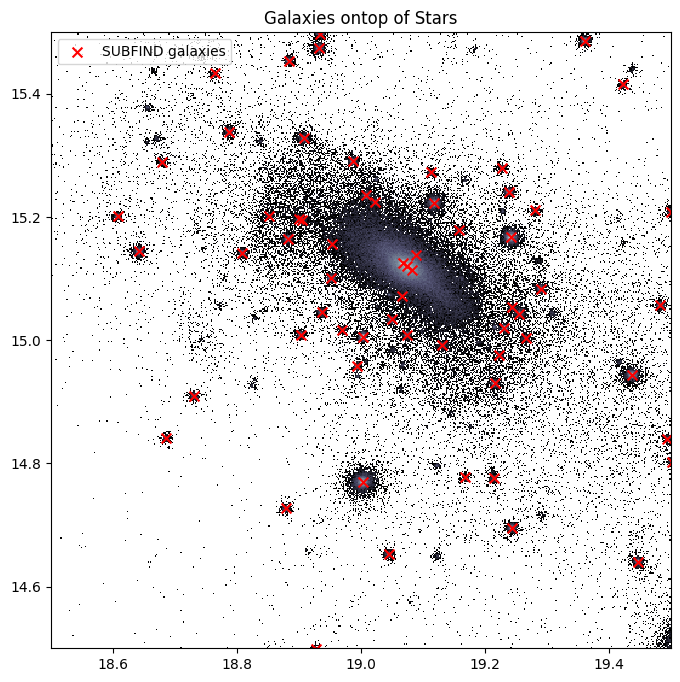

In [9]:
fig = plt.figure(figsize=(8,8))

plt.hist2d(sliced_s[_slice_][:,1] , sliced_s[_slice_][:,0],cmap='bone',norm=colors.LogNorm(),
           bins=(np.linspace(18.5,19.5,512),np.linspace(14.5,15.5,512)), label='star density')
plt.scatter(sliced_g[_slice_][:,1] , sliced_g[_slice_][:,0], marker='x', s=50, alpha=1,c='r',label='SUBFIND galaxies')
plt.xlim(18.5,19.5)
plt.ylim(14.5,15.5)
plt.legend()
plt.title('Galaxies ontop of Stars')

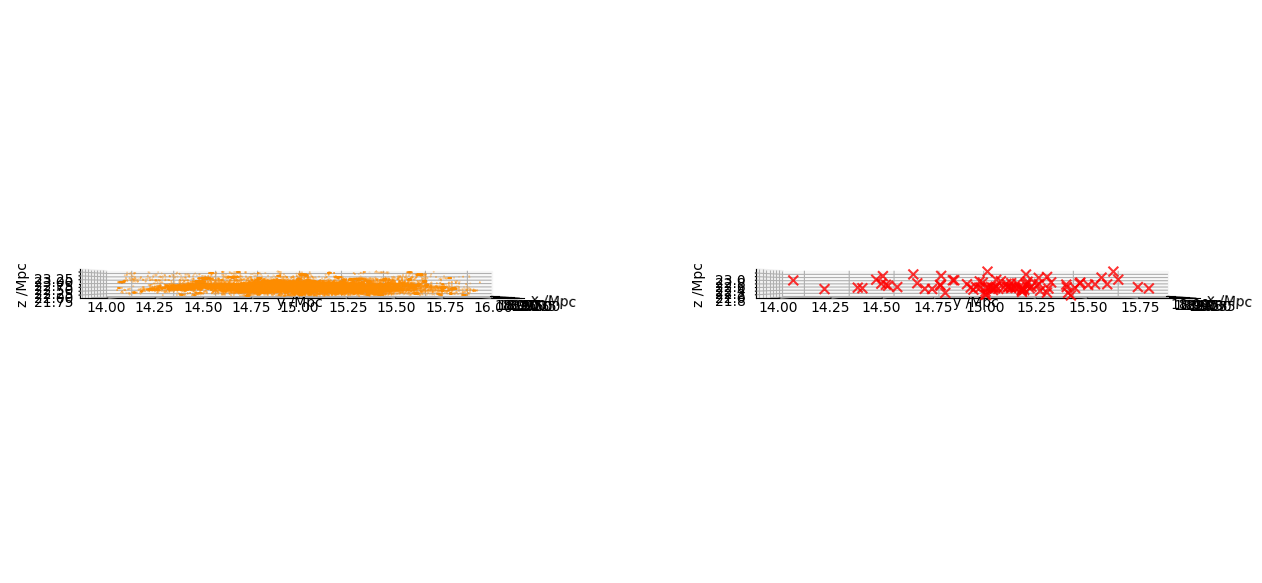

In [10]:
%
y = np.where(14<sliced_s[_slice_][:,0], sliced_s[_slice_][:,0], np.nan)
y = np.where(16>y, y, np.nan)
x = np.where(18<sliced_s[_slice_][:,1], sliced_s[_slice_][:,1], np.nan)
x = np.where(20>x, x, np.nan)
y2 = np.where(14<sliced_g[_slice_][:,0], sliced_g[_slice_][:,0], np.nan)
y2 = np.where(16>y2, y2, np.nan)
x2 = np.where(18<sliced_g[_slice_][:,1], sliced_g[_slice_][:,1], np.nan)
x2 = np.where(20>x2, x2, np.nan)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(x, y, sliced_s[_slice_][:,2], marker='o', s=0.1, c='darkorange')
ax.view_init(elev=0, azim=0)
ax.set_xlabel('x /Mpc')
ax.set_ylabel('y /Mpc')
ax.set_zlabel('z /Mpc')
ax.set_box_aspect([25,25,25/15])
ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.scatter(x2 ,y2 , sliced_g[_slice_][:,2], marker='x', s=50, alpha=0.8,c='r')
ax2.view_init(elev=0, azim=0)
ax2.set_xlabel('x /Mpc')
ax2.set_ylabel('y /Mpc')
ax2.set_zlabel('z /Mpc')
ax2.set_box_aspect([25,25,25/15])

#### Asigning a Galaxy to every star within a certain threshold

In [11]:
from scipy.spatial import cKDTree

def assign_star_to_galaxy_kdtree(pos_s, pos_g, threshold):
    # Build KDTree using galaxy positions
    kdtree = cKDTree(pos_g)

    # Initialize an array to keep track of assigned star particles
    assigned = np.zeros(len(pos_s), dtype=bool)

    # Initialize an array to store the assignment of each star particle to a galaxy particle
    assignment = -np.ones(len(pos_s), dtype=int)  # The index of the galaxy particle

    for i, star_pos in enumerate(pos_s):
        # Find the index of the nearest galaxy particle and its distance
        nearest_galaxy_index = kdtree.query(star_pos, k=1)[1]
        distance = kdtree.query(star_pos, k=1)[0]

        if distance < threshold:
            assigned[i] = True
            assignment[i] = nearest_galaxy_index

    return assigned, assignment

In [12]:
star_p = sliced_s[_slice_]
star_den = sliced_s_den[_slice_]
galaxy_p = sliced_g[_slice_]
darkm_p = sliced_dm[_slice_]
assigned, assignment = assign_star_to_galaxy_kdtree(star_p, galaxy_p, threshold=0.05)

print("Assigned Stars: ", star_p[assigned].shape)
print("Unassigned Stars: ", star_p[~assigned].shape)
print("Assigned Galaxies: ", max(assignment) + 1)
print("Unassigned Galaxies: ", galaxy_p.shape[0] - (max(assignment)+1))

Assigned Stars:  (457361, 3)
Unassigned Stars:  (95758, 3)
Assigned Galaxies:  222
Unassigned Galaxies:  0


#### Calculating Ellipticities of each galaxy cluster

In [61]:
def ellipticity(centre, theta, weight):
    '''Calculates the ellipticity of a galaxy given its centre and positions of stellar particles
    centre - Crentre of galaxy
    theta - position of stars
    weight - weighting of each star - defined as the density of space around that star'''
    #centre = centre[:2]        # 2D
    #theta = theta[:,:2]
    separation = theta - centre  #calculating separations of members from cluster centre
    
    prob = weight/max(weight)
    prob = np.array([prob,prob]).T # multiply x and y coord
    separation_scaled = np.multiply(separation, prob)

    Q = (separation.T.dot(separation_scaled))         #'the correlation matrix'
    epsilon = (Q[0, 0] - Q[1, 1] + 2j*Q[0,1])/(Q[0, 0] + Q[1,1] + 2*np.sqrt(np.linalg.det(Q)))				#epsilon

    return epsilon

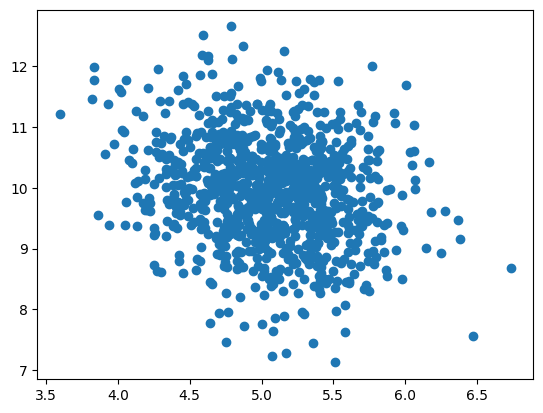

In [63]:
x = np.random.default_rng().multivariate_normal(mean=np.array([10,10]),cov=np.identity(2)-0.2*np.ones((2,2)), size=1000).T
x[0]=x[0]*0.5
plt.scatter(x[0], x[1])

In [64]:
test = ellipticity(centre=np.array([10,10]), theta=x.T, weight=x[0]*0+1)
print(test)

(0.702616915260092+0.009824538224257483j)


In [14]:
e_glxys = np.zeros(len(galaxy_p), dtype = 'complex_')

for i in range(len(galaxy_p)):
    e_glxys[i] = ellipticity(centre=galaxy_p[i], theta=star_p[assignment==i], weight=star_den[assignment==i])
    
phis = np.degrees(np.angle(e_glxys))/2						#angle of ellipse in degrees    
axis_ratio = (1 - np.absolute(e_glxys))/(1 + np.absolute(e_glxys))

In [15]:
def stick_plot(x, y, axis_ratio, phi, bar_scaling=1):
    '''Imput the positions of galaxies '''
    axis_ratio = 1/(axis_ratio)  * bar_scaling # making more elliptical galaxies loger bars
    del_y = axis_ratio*np.sin(phi)
    del_x = axis_ratio*np.cos(phi)
    # positions of ends of bar
    barx = np.array([x+del_x,x-del_x])
    bary = np.array([y+del_y,y-del_y])
    bars = np.array([barx,bary])
    
    #fig, ax = plt.subplots(figsize=(6,6))
    for i in range(len(axis_ratio)):
        ax.plot(bars[1,:,i],bars[0,:,i],color='#EF2E72') # NOTE.... displaying with x and y inverted
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('Showing Ellipticities of Galaxies')
        ax.set_box_aspect(1)
    plt.show()

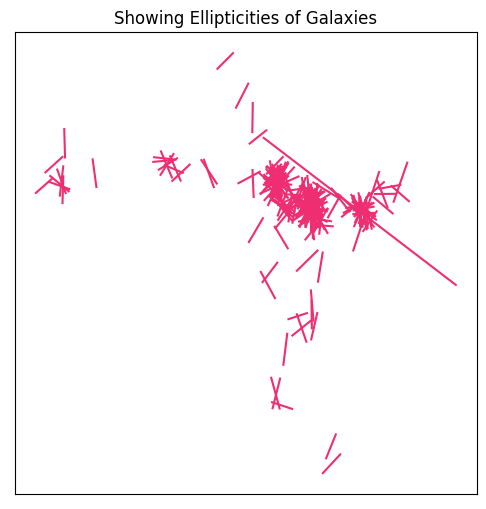

average q value of elliptical galaxies:  0.8584504091707886


In [16]:
fig, ax = plt.subplots(figsize=(6,6))
stick_plot(galaxy_p[:,0], galaxy_p[:,1], axis_ratio, phis, bar_scaling=0.6)
print("average q value of elliptical galaxies: ", np.mean(axis_ratio))

### Finding the two point Shear-Shear correlation of the Galaxies.

In [17]:
cat1 = treecorr.Catalog(x=galaxy_p[:,0], y=galaxy_p[:,1], g1=e_glxys.real, g2=e_glxys.imag, npatch =20) # two shear values (g1, g2) 
gg = treecorr.GGCorrelation(min_sep=0.1, max_sep=43, nbins=100, var_method='jackknife')#, sep_units='arcmin')
print('bin_size = %.6f'%gg.bin_size)
t1 = time.time()
gg.process(cat1)  # Takes approx 1 minute / million objects
t2 = time.time()
print('Time for calculating gg correlation = ',t2-t1)

bin_size = 0.060638
Time for calculating gg correlation =  0.0569150447845459


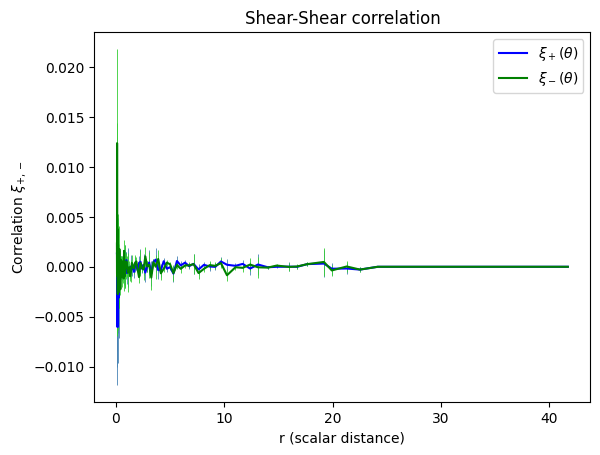

In [18]:
# Plotting results
r = np.exp(gg.meanlogr)
xip = gg.xip
xim = gg.xim
sig = np.sqrt(gg.varxip)

plt.plot(r, xip, color='blue', label =r'$\xi_+(\theta)$')
plt.errorbar(r, xip, yerr=sig, color='blue', ecolor='steelblue', lw=0.6, ls='')


plt.plot(r, xim, color='green',label=r'$\xi_-(\theta)$')
plt.errorbar(r, xim, yerr=sig, color='green', ecolor='limegreen', lw=0.6, ls='')

plt.xlabel(r'r (scalar distance)')
plt.legend()
#plt.xlim( [0,20] )
plt.ylabel(r'Correlation $\xi_{+,-}$')
plt.title('Shear-Shear correlation')
plt.show()

## Finding the two point correlation of the galaxies with dark matter (Point-Shear)

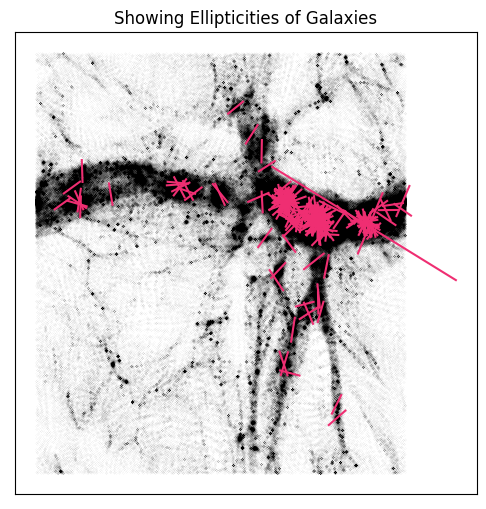

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(darkm_p[:,1], darkm_p[:,0], marker='o', s=0.0008, alpha=0.5,c='k')
stick_plot(galaxy_p[:,0], galaxy_p[:,1], axis_ratio, phis, bar_scaling=0.6)

In [20]:
cat2 = treecorr.Catalog(x=darkm_p[:,0], y=darkm_p[:,1], npatch=20)
ng = treecorr.NGCorrelation(min_sep=0.1, max_sep=40, nbins=100, var_method='jackknife')
print('bin_size = %.6f'%gg.bin_size)
t1 = time.time()
ng.process(cat2,cat1)  # Takes approx 1 minute / million objects
t2 = time.time()
print('Time for calculating ng correlation = ',t2-t1)

bin_size = 0.060638
Time for calculating ng correlation =  5.8372368812561035


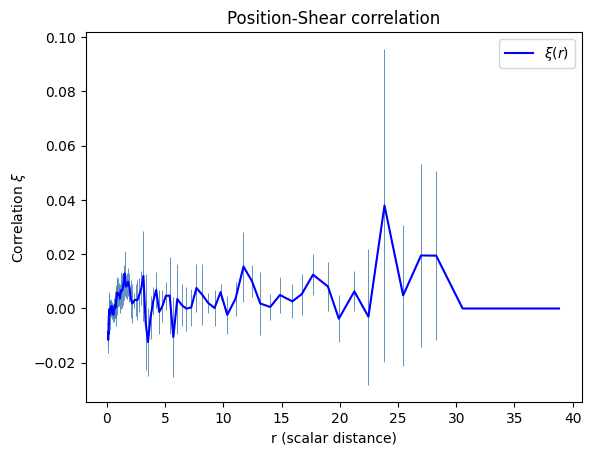

In [21]:
# Plotting results
r = np.exp(ng.meanlogr)
xi = ng.xi
sigma = np.sqrt(ng.varxi)

plt.plot(r, xi, color='blue', label =r'$\xi(r)$')
plt.errorbar(r, xi, yerr=sigma, color='blue', ecolor='steelblue', lw=0.6, ls='solid')
plt.xlabel(r'r (scalar distance)')
plt.ylabel(r'Correlation $\xi$')
plt.title('Position-Shear correlation')
plt.legend()
plt.show()